**Binary Classification of Machine Failures**

In [571]:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [572]:
df= pd.read_csv('train.csv')
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [573]:
df1= pd.read_csv('test.csv') 
df1.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


**Exploratory Data Analysis**

In [574]:
def DataReport(df):
    print(f"Dataset Shape: {df.shape}")
    data_info  = pd.DataFrame(df.dtypes,columns=['dtypes'])
    data_info  = data_info .reset_index()
    data_info ['Name'] = data_info ['index']
    data_info  = data_info [['Name','dtypes']]
    data_info ['Missing'] = df.isnull().sum().values
    data_info ['Uniques'] = df.nunique().values
    data_info ['First Value'] = df.loc[0].values
    data_info ['Second Value'] = df.loc[1].values
    return data_info

In [575]:
DataReport(df)


Dataset Shape: (414, 8)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,id,int64,0,414,0.000,1.000
1,gravity,float64,0,28,1.013,1.025
2,ph,float64,0,71,6.190,5.400
3,osmo,int64,0,80,443.000,703.000
4,cond,float64,0,65,14.800,23.600
5,urea,int64,0,73,124.000,394.000
6,calc,float64,0,85,1.450,4.180
7,target,int64,0,2,0.000,0.000


In [576]:
df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [577]:
DataReport(df1)


Dataset Shape: (276, 7)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,id,int64,0,276,414.000,415.00
1,gravity,float64,0,27,1.017,1.02
2,ph,float64,0,62,5.240,5.68
3,osmo,int64,0,75,345.000,874.00
4,cond,float64,0,58,11.500,29.00
5,urea,int64,0,71,152.000,385.00
6,calc,float64,0,74,1.160,3.46


<Axes: >

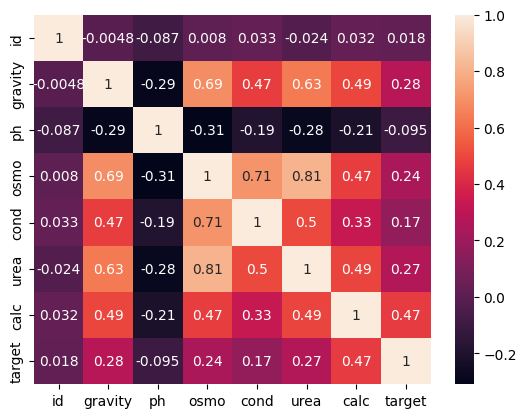

In [578]:
sns.heatmap(df.corr(), annot= True)

as Osmo and Urea are correlated, and osmo is less correlated with target

In [579]:

df['target'].value_counts()

0    230
1    184
Name: target, dtype: int64

0    230
1    184
Name: target, dtype: int64

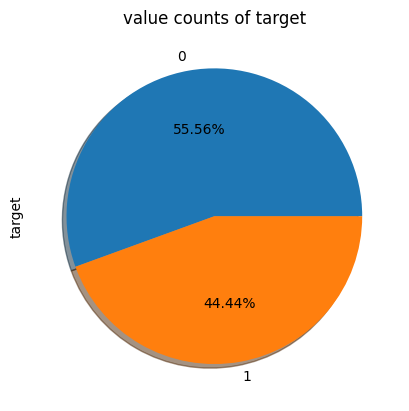

In [580]:
#visualizing with a pie chart to check whether the data (train dataset) is balanced
target_counts= df['target'].value_counts()
target_counts.plot(kind= 'pie', autopct= '%1.2f%%', shadow= True)
plt.title('value counts of target')
df['target'].value_counts()

its balanced 
 

<Axes: xlabel='osmo', ylabel='Count'>

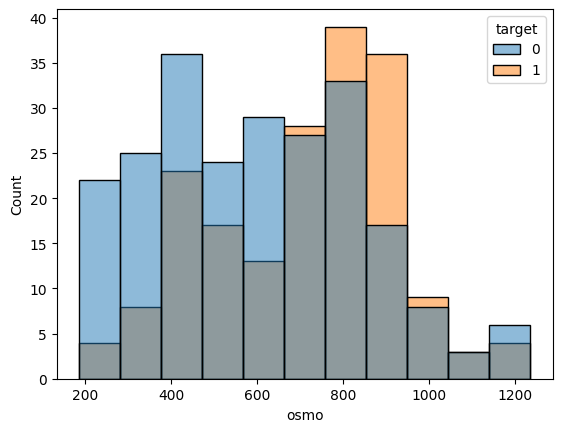

In [581]:
sns.histplot(data= df, x='osmo', hue='target')

In [582]:
y= df['target']
x= df.drop(['id', "osmo",'target'], axis= 1)
y.shape

(414,)

In [583]:
df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


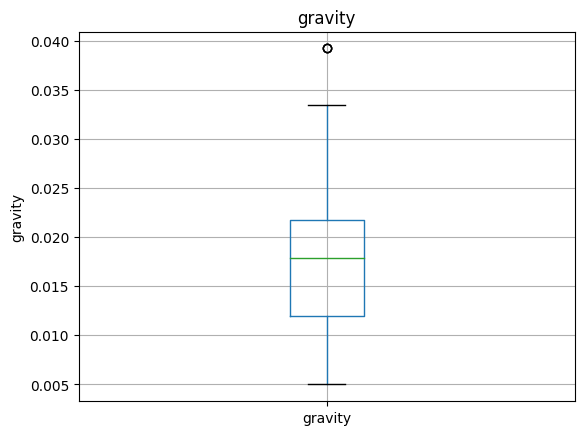

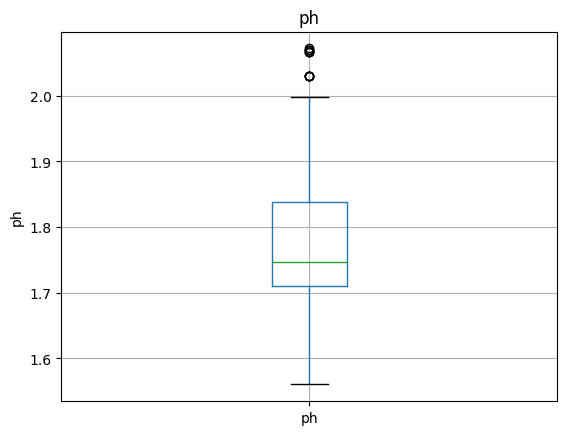

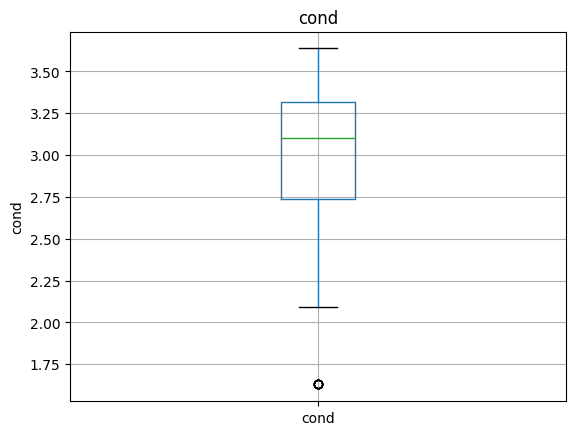

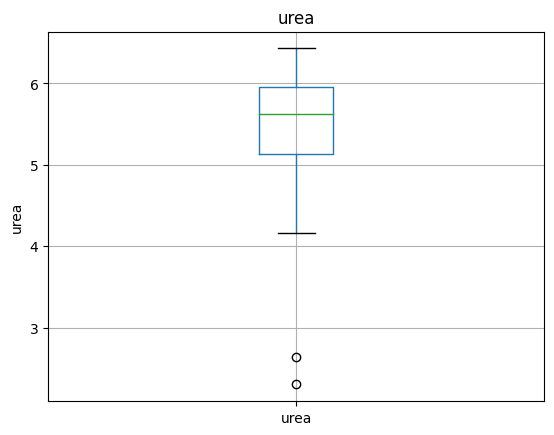

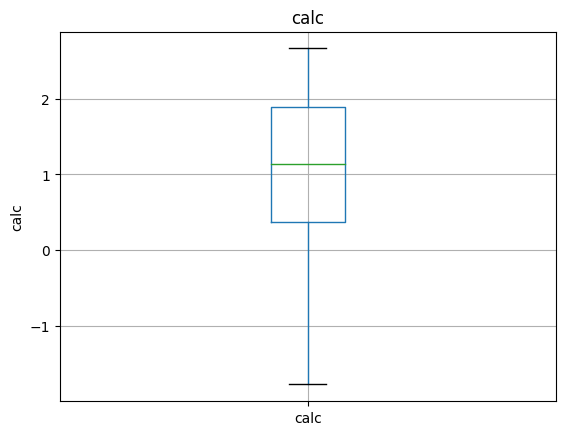

In [584]:
continuous_feature=["gravity","ph","cond","urea","calc"]
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


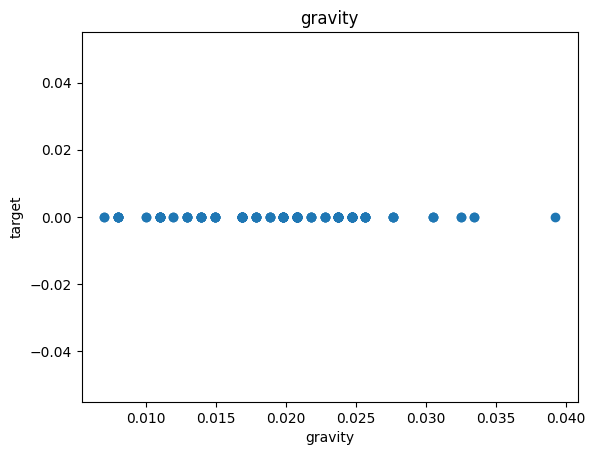

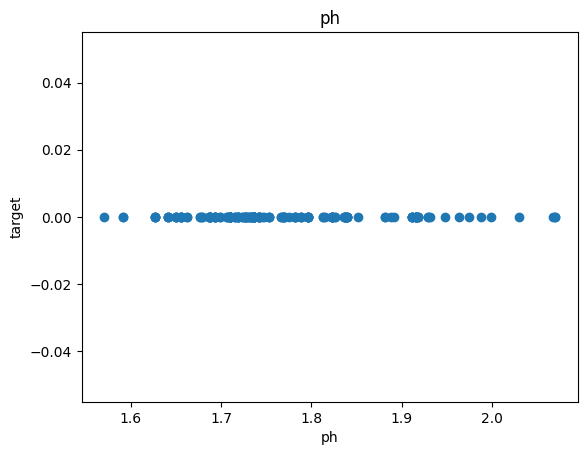

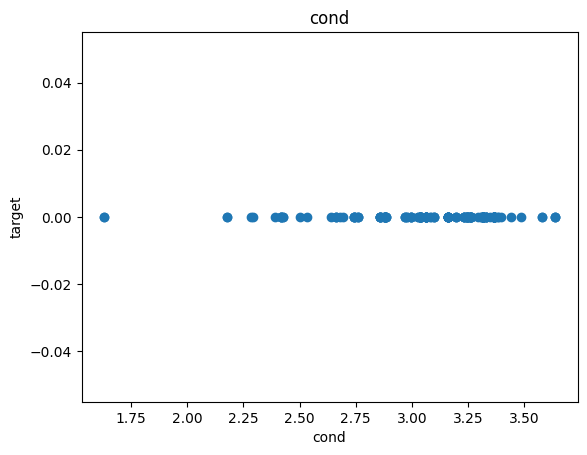

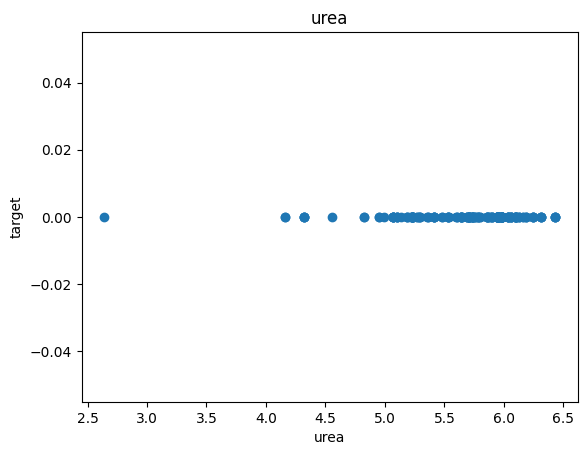

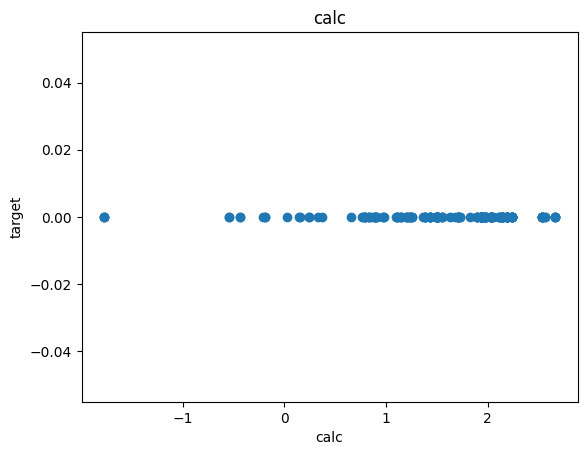

In [585]:
# ## We will be using logarithmic transformation


# for feature in continuous_feature:
#     data=df.copy()
#     if 0 in data[feature].unique():
#         pass
#     else:
#         data[feature]=np.log(data[feature])
#         data['target']=np.log(data['target'])
#         plt.scatter(data[feature],data['target'])
#         plt.xlabel(feature)
#         plt.ylabel('target')
#         plt.title(feature)
#         plt.show()
        
    

In [586]:
x

,gravity,ph,cond,urea,calc
0,1.013,6.19,14.8,124,1.45
1,1.025,5.40,23.6,394,4.18
2,1.009,6.13,24.5,159,9.04
3,1.021,4.91,20.8,398,6.63
4,1.021,5.53,17.8,385,2.21
...,...,...,...,...,...
409,1.011,5.21,21.4,75,1.53
410,1.024,5.53,19.7,224,0.77
411,1.018,6.28,22.2,270,7.68
412,1.008,7.12,12.6,75,1.03


*split the data set*

In [587]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((289, 5), (289,), (125, 5), (125,))

In [588]:

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler and fit it on training data
scaler = MinMaxScaler().fit(x_train)

# Transform training data and convert it to a DataFrame
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)

# Now, x_train_scaled is a DataFrame containing the scaled data
x_train_scaled

# Initialize the scaler and fit it on training data
scaler = MinMaxScaler().fit(x_test)

# Transform training data and convert it to a DataFrame
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Now, x_test_scaled is a DataFrame containing the scaled data
x_test_scaled




,gravity,ph,cond,urea,calc
0,0.689655,0.414815,0.732899,0.757426,0.650670
1,0.551724,0.066667,0.778502,0.607261,0.481299
2,0.551724,0.111111,0.530945,0.707921,0.237121
3,0.413793,0.611111,0.348534,0.500000,0.367678
4,0.206897,0.696296,0.338762,0.239274,0.174312
...,...,...,...,...,...
120,0.000000,0.611111,0.097720,0.191419,0.062103
121,0.344828,0.414815,0.671010,0.445545,0.650670
122,0.172414,0.637037,0.198697,0.346535,0.141143
123,0.620690,0.285185,0.778502,0.570957,0.091743


In [589]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the scaler and fit it on your training data
# scaler = MinMaxScaler().fit(x_train)

# # Transform your training data and save it back to x_train
# x_train = scaler.transform(x_train)

# # Now, x_train contains the scaled data
# x_train

**Logistic regression**

In [590]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr= lr.predict(x_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
cm= confusion_matrix(y_test, y_pred_lr) 
cm

array([[55, 12],
       [15, 43]], dtype=int64)

In [591]:
cr= classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        67
           1       0.78      0.74      0.76        58

    accuracy                           0.78       125
   macro avg       0.78      0.78      0.78       125
weighted avg       0.78      0.78      0.78       125



**Descision tree**

In [592]:
from sklearn.tree import DecisionTreeClassifier           
dt= DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
y_pred_tree= dt.predict(x_test_scaled)
cm= confusion_matrix(y_pred_tree, y_test)
cm

array([[50, 21],
       [17, 37]], dtype=int64)

In [593]:
cr= classification_report(y_pred_tree, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        71
           1       0.64      0.69      0.66        54

    accuracy                           0.70       125
   macro avg       0.69      0.69      0.69       125
weighted avg       0.70      0.70      0.70       125



**Random Forest**

In [594]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators= 50)
rf.fit(x_train, y_train)
y_pred_rf= rf.predict(x_test)
cm= confusion_matrix(y_pred_rf, y_test)
cm

array([[53, 14],
       [14, 44]], dtype=int64)

In [595]:
cr= classification_report(y_pred_rf, y_test)
print(cr)
                          

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        67
           1       0.76      0.76      0.76        58

    accuracy                           0.78       125
   macro avg       0.77      0.77      0.77       125
weighted avg       0.78      0.78      0.78       125



**KNN**

In [596]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
y_predict_knn= knn.predict(x_test_scaled)
cm= confusion_matrix(y_predict_knn, y_test)
cm

array([[52, 14],
       [15, 44]], dtype=int64)

In [597]:
cr= classification_report(y_predict_knn, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        66
           1       0.76      0.75      0.75        59

    accuracy                           0.77       125
   macro avg       0.77      0.77      0.77       125
weighted avg       0.77      0.77      0.77       125



In our models ,Random Forest give the best result

In [598]:
df2=df1.drop(['id',"osmo"], axis=1)
df2.head()

,gravity,ph,cond,urea,calc
0,1.017,5.24,11.5,152,1.16
1,1.020,5.68,29.0,385,3.46
2,1.024,5.36,19.5,354,13.00
3,1.020,5.33,25.3,252,3.46
4,1.011,5.87,29.0,457,2.36


fit the test data to our model and upload the results to Submission.csv 

In [599]:
test_y_pred= rf.predict(df2)
test_y_pred
test_y_pred_prob= rf.predict_proba(df2)
y_pred_df= pd.DataFrame(test_y_pred, columns=['target'])
y_pred_df_prob= pd.DataFrame(test_y_pred_prob, columns=['target1', 'target2'])
submission= pd.concat([df1,y_pred_df,y_pred_df_prob], axis=1 )
submission.head()
submission[['id', 'target']].to_csv('submission.csv', index=False)